## Global Power Plant Database

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. 
It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. 
The database covers approximately all powerpplansts fron INDIA .Our objective is to build a model to predict  
Primary Fuel,capacity_mw from frature like ggeneration_gwh_2013	generation_gwh_2014	generation_gwh_2015	generation_gwh_2016	generation_gwh_2017

In [1]:
# importing project dependencies:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [188]:
# import the data with lower case x=column name
df_main = pd.read_csv('database_IND.csv')


In [79]:
# import the data with lower case x=column name
df = df_main.copy()
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
pd.set_option('display.max_columns', None)

In [82]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())

Size of dataset 
  (908, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-

In [190]:
df.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,total_generation
count,908.000000,862.000000,862.000000,908,384.000000,401.000000,425.000000,437.000000,443.000000,378.000000
unique,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Coal,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,259,NaN,NaN,NaN,NaN,NaN,NaN
mean,321.046378,21.196189,77.447848,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,12569.845799
std,580.221767,6.248627,4.907260,NaN,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,20530.476293
min,0.000000,8.168900,68.644700,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,NaN,244.458088,223.650436,174.174750,187.193669,177.643170,1406.027038
50%,60.000000,21.778300,76.719250,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,4353.873000
75%,388.125000,25.516375,79.441475,NaN,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,15722.450662


In [183]:
# Adding total Genration to find missing values 
df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017'] 

In [84]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736


In [22]:
# Dropping columns with consatnt data or Null data more that 900

In [85]:
df = df.drop(['country','wepp_id','country_long','source','geolocation_source','name','gppd_idnr','url','source','other_fuel2','other_fuel3','estimated_generation_gwh'],axis = 1)

In [87]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,22248.789736


In [88]:
#Null data percentage 
for i in df:
    print (i,'\n',(df[i].isna().sum())/len(df)*100)
    

capacity_mw 
 0.0
latitude 
 5.066079295154185
longitude 
 5.066079295154185
primary_fuel 
 0.0
other_fuel1 
 78.08370044052863
commissioning_year 
 41.85022026431718
owner 
 62.33480176211453
year_of_capacity_data 
 42.731277533039645
generation_gwh_2013 
 57.70925110132159
generation_gwh_2014 
 55.837004405286336
generation_gwh_2015 
 53.19383259911894
generation_gwh_2016 
 51.87224669603524
generation_gwh_2017 
 51.2114537444934
generation_data_source 
 50.440528634361236
total_generation 
 58.370044052863435


In [89]:
# Other Fuel 78 percent null and can be dropped 
# and Onwner name is are varied  hence can be dropped fromthe data set as its has60 percent NUll 

In [90]:
df = df.drop(['other_fuel1','owner'],1)

Inference
* The dataset has 908  observations with 25 rows.
* Though the dataset having a lot of  missing  values on an avearge 50 % data is missing inthe tables.
* There are lot of columns which are having static data and will not impact the results 
* Such features will dropped form the datset


In [75]:
#Univariate Analysis

In [91]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,22248.789736


In [92]:
df.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
total_generation          530
dtype: int64

In [158]:
df_cleaned = df.copy()

In [159]:
df_cleaned

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,total_generation
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,631.777928,617.789264,843.747000,886.004428,663.774500,3643.093120
4,1800.0,21.9603,82.4091,Coal,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,22248.789736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,NaN,NaN,0.994875,233.596650,865.400000,NaN
904,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# We need to identify which one of these are having no data from 2013-2017
df_cleaned['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(0)
df_cleaned['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(0)
df_cleaned['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(0)
df_cleaned['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(0)
df_cleaned['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(0)
df_cleaned['total_generation'] = df['total_generation'].fillna(0)

In [161]:
df_cleaned['total_generation'] = df_cleaned['generation_gwh_2013'] + df_cleaned['generation_gwh_2014'] + df_cleaned['generation_gwh_2015'] + df_cleaned['generation_gwh_2016'] + df_cleaned['generation_gwh_2017']

In [118]:
# Droppinng columsn whcih will not have a direct effect on them 
df = df.drop(['commissioning_year','year_of_capacity_data','generation_data_source',],1)

In [162]:
len(df_cleaned)

908

In [163]:
#Drop those columns whcih have no input from 2103--2017 
df_cleaned = df_cleaned[df_cleaned.total_generation != 0]

In [164]:
#DATA dropped 

len(df)-len(df_cleaned)

473

In [165]:
#Almost 50 percent data droped as they didinot have any values 

df_cleaned

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,total_generation
3,135.0,23.8712,91.3602,Gas,631.777928,617.789264,843.747000,886.004428,663.774500,3643.093120
4,1800.0,21.9603,82.4091,Coal,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,22248.789736
5,250.0,23.7689,68.6447,Coal,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,5507.749000
6,60.0,10.4547,77.0078,Hydro,147.568450,157.558250,152.195200,61.421350,89.629600,608.372850
7,192.0,32.2258,77.2070,Hydro,696.738800,674.391100,721.335200,675.724400,679.594950,3447.784450
...,...,...,...,...,...,...,...,...,...,...
891,540.0,20.2727,78.9792,Coal,2311.320000,1045.820000,1651.158900,1229.480000,999.170000,7236.948900
894,62.4,30.3033,77.5684,Hydro,203.975000,184.453100,183.000000,204.253600,175.866250,951.547950
900,600.0,30.1081,77.3257,Coal,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669,16341.553750
902,106.6,13.1156,77.5838,Oil,20.900000,0.000000,0.000000,0.000000,0.000000,20.900000


In [166]:
#Primary Fuel
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [167]:
df_cleaned.loc[df['primary_fuel'] == 'Hydro'].isna().sum()

capacity_mw            0
latitude               3
longitude              3
primary_fuel           0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
total_generation       0
dtype: int64

<AxesSubplot:>

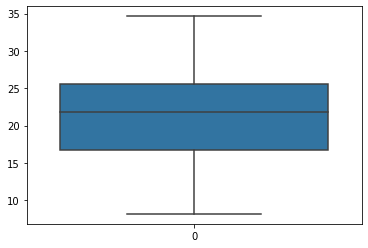

In [168]:
#latitude

sns.boxplot(data=df.latitude,orient='v')

In [169]:
df_cleaned.loc[df['primary_fuel'] == 'Coal'].isna().sum()

capacity_mw            0
latitude               4
longitude              4
primary_fuel           0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
total_generation       0
dtype: int64

In [120]:
df_cleaned['generation_data_source'].value_counts()

Central Electricity Authority    435
Name: generation_data_source, dtype: int64

In [117]:

df_cleaned.head(1)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,total_generation
3,135.0,23.8712,91.3602,Gas,2004.0,2018.0,631.777928,617.789264,843.747,886.004428,663.7745,Central Electricity Authority,3643.09312


In [123]:
df_cleaned.isna().sum()

capacity_mw               0
latitude                  8
longitude                 8
primary_fuel              0
commissioning_year        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
total_generation          0
dtype: int64

In [125]:
df_cleaned.shape

(435, 13)

In [126]:
# Droppinng columsn whcih will not have a direct effect on them 
df_cleaned = df_cleaned.drop(['year_of_capacity_data','generation_data_source',],1)

In [127]:
df_cleaned.shape

(435, 11)

In [143]:
df2=df_cleaned.copy()

In [172]:
from sklearn.preprocessing import LabelEncoder

lab_enc =LabelEncoder()
df_cleaned["primary_fuel"]  = lab_enc.fit_transform(df_cleaned['primary_fuel'])

In [177]:
df_cleaned

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,total_generation
3,135.0,23.8712,91.3602,1,631.777928,617.789264,843.747000,886.004428,663.774500,3643.093120
4,1800.0,21.9603,82.4091,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,22248.789736
5,250.0,23.7689,68.6447,0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,5507.749000
6,60.0,10.4547,77.0078,2,147.568450,157.558250,152.195200,61.421350,89.629600,608.372850
7,192.0,32.2258,77.2070,2,696.738800,674.391100,721.335200,675.724400,679.594950,3447.784450
...,...,...,...,...,...,...,...,...,...,...
891,540.0,20.2727,78.9792,0,2311.320000,1045.820000,1651.158900,1229.480000,999.170000,7236.948900
894,62.4,30.3033,77.5684,2,203.975000,184.453100,183.000000,204.253600,175.866250,951.547950
900,600.0,30.1081,77.3257,0,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669,16341.553750
902,106.6,13.1156,77.5838,4,20.900000,0.000000,0.000000,0.000000,0.000000,20.900000


In [128]:
from sklearn.impute import  KNNImputer

In [138]:
knn_ip =KNNImputer(n_neighbors =2)


In [174]:
df_cleaned["latitude"]=knn_ip.fit_transform(df_cleaned[['latitude']])

In [176]:
df_cleaned["longitude"]= knn_ip.fit_transform(df_cleaned[['longitude']])

In [178]:
df_cleaned.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
total_generation       0
dtype: int64

In [179]:
df_cleaned

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,total_generation
3,135.0,23.8712,91.3602,1,631.777928,617.789264,843.747000,886.004428,663.774500,3643.093120
4,1800.0,21.9603,82.4091,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,22248.789736
5,250.0,23.7689,68.6447,0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,5507.749000
6,60.0,10.4547,77.0078,2,147.568450,157.558250,152.195200,61.421350,89.629600,608.372850
7,192.0,32.2258,77.2070,2,696.738800,674.391100,721.335200,675.724400,679.594950,3447.784450
...,...,...,...,...,...,...,...,...,...,...
891,540.0,20.2727,78.9792,0,2311.320000,1045.820000,1651.158900,1229.480000,999.170000,7236.948900
894,62.4,30.3033,77.5684,2,203.975000,184.453100,183.000000,204.253600,175.866250,951.547950
900,600.0,30.1081,77.3257,0,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669,16341.553750
902,106.6,13.1156,77.5838,4,20.900000,0.000000,0.000000,0.000000,0.000000,20.900000


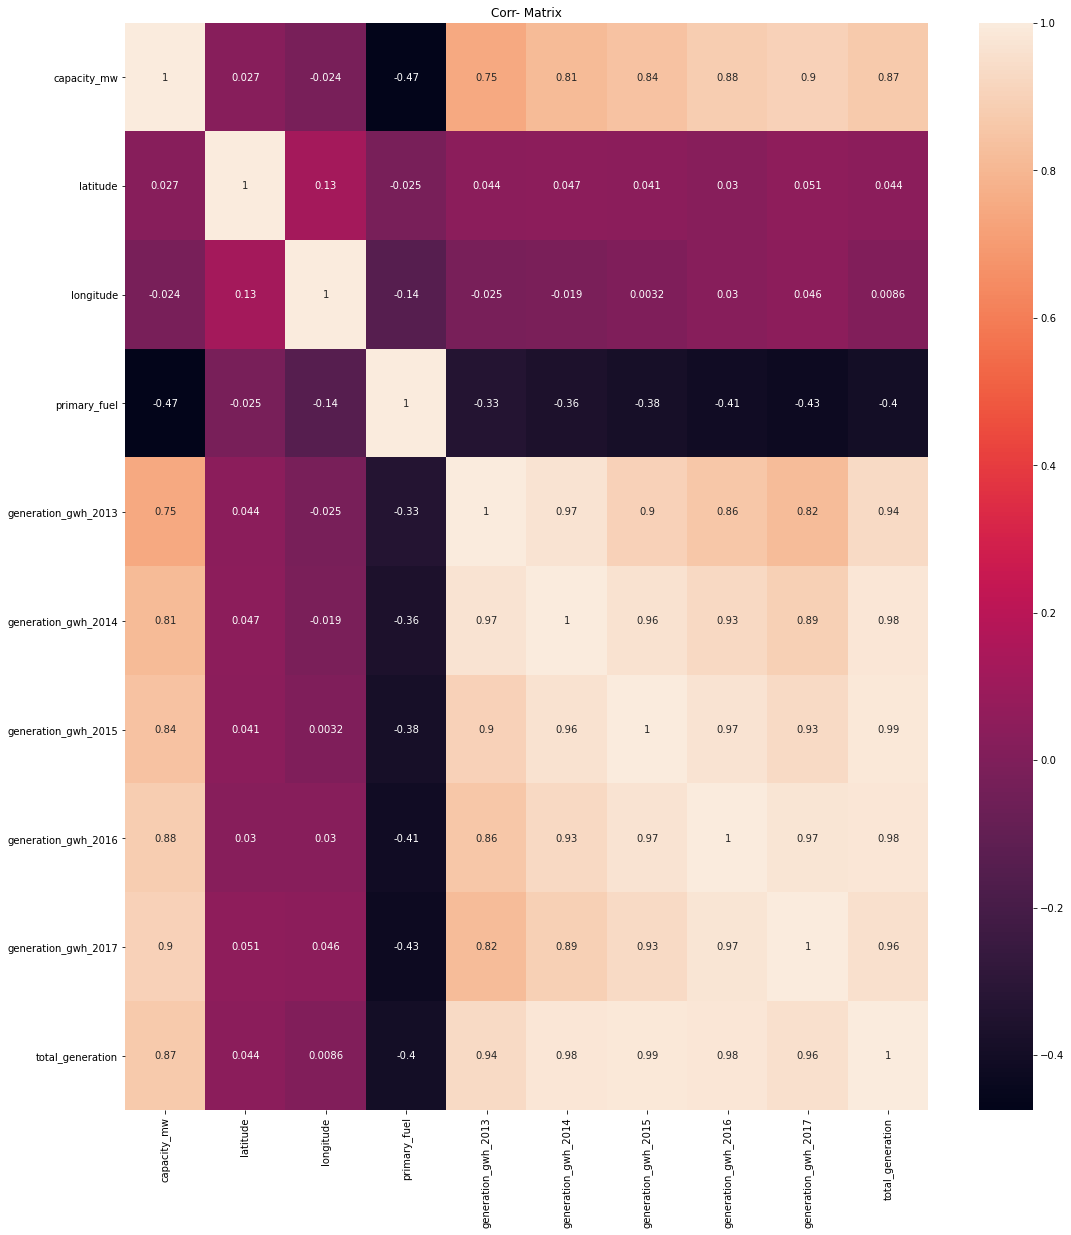

In [180]:
# Data is shewed in some segments 
#Checking correlarion and heat map 
df_corr = df_cleaned.corr()
plt.figure(figsize=[18,20])
sns.heatmap(df_corr,annot=True)
plt.title('Corr- Matrix')
plt.show()

In [185]:
df_cleaned

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,1,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
5,250.0,23.7689,68.6447,0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
6,60.0,10.4547,77.0078,2,147.568450,157.558250,152.195200,61.421350,89.629600
7,192.0,32.2258,77.2070,2,696.738800,674.391100,721.335200,675.724400,679.594950
...,...,...,...,...,...,...,...,...,...
891,540.0,20.2727,78.9792,0,2311.320000,1045.820000,1651.158900,1229.480000,999.170000
894,62.4,30.3033,77.5684,2,203.975000,184.453100,183.000000,204.253600,175.866250
900,600.0,30.1081,77.3257,0,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669
902,106.6,13.1156,77.5838,4,20.900000,0.000000,0.000000,0.000000,0.000000


In [201]:
df_cleaned.skew()

capacity_mw            2.279653
latitude              -0.189577
longitude              0.816366
primary_fuel           0.303988
generation_gwh_2013    1.371039
generation_gwh_2014    1.345588
generation_gwh_2015    1.406148
generation_gwh_2016    1.340291
generation_gwh_2017    1.270252
dtype: float64

In [199]:
clmn = np.array(['generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','generation_gwh_2013',])

In [200]:
df_cleaned[clmn] = np.sqrt(df_cleaned[clmn])

In [202]:
df_cleaned

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,1,25.135193,24.855367,29.047323,29.765827,25.763822
4,1800.0,21.9603,82.4091,0,40.844706,55.095826,76.917943,79.012657,73.386509
5,250.0,23.7689,68.6447,0,28.667019,33.962052,34.768549,34.289430,33.880865
6,60.0,10.4547,77.0078,2,12.147776,12.552221,12.336742,7.837177,9.467291
7,192.0,32.2258,77.2070,2,26.395810,25.969041,26.857684,25.994699,26.069042
...,...,...,...,...,...,...,...,...,...
891,540.0,20.2727,78.9792,0,48.076190,32.339140,40.634455,35.063942,31.609650
894,62.4,30.3033,77.5684,2,14.281982,13.581351,13.527749,14.291732,13.261457
900,600.0,30.1081,77.3257,0,56.196228,56.518668,60.906093,55.888926,56.178765
902,106.6,13.1156,77.5838,4,4.571652,0.000000,0.000000,0.000000,0.000000


## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.

In [ ]:
# Train Test Split 
# Setting X and y axis and splitting the data into train and test respectively.


In [206]:
#X = df_cleaned.drop(['capacity_mw','primary_fuel'],1)
#y = df_cleaned['capacity_mw','primary_fuel']

X = df_cleaned.drop(['capacity_mw','primary_fuel'],1)
y = df_cleaned[['capacity_mw','primary_fuel']]
# checking the shapes
X.shape,y.shape

((435, 7), (435, 2))

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [208]:
Xscaled=scaler.fit_transform(X)

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.3,random_state=42)

In [210]:
# checking the shape
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_test.shape)
print ('YTRAIN \n',y_test.shape)

XTRAIN 
 (304, 7)
YTRAIN 
 (304, 2)
XTEST 
 (131, 7)
YTRAIN 
 (131, 2)


In [211]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,0.953436,-0.273349,0.533608,0.702283,0.697180,0.669267,0.626591
1,0.133319,0.603669,-0.549232,-0.586683,-0.565701,-0.781693,-0.785802
2,0.531857,1.520108,2.684702,2.675516,2.563325,2.600408,2.584742
3,-1.713812,-0.487266,-0.336369,-0.388555,-0.493751,-0.639524,-0.594241
4,-0.449409,-0.013412,3.342708,3.249790,3.140742,3.023515,2.887227
...,...,...,...,...,...,...,...
299,1.250056,-0.256123,-0.157458,-0.205161,-0.273536,-0.308858,-0.322402
300,1.334084,-0.398230,-0.571351,-0.646984,-0.696189,-0.798418,-0.795232
301,0.719954,0.140775,-0.250297,-0.174622,-0.461356,-0.367035,-0.672388
302,-1.721825,-0.519576,-0.533633,-0.583392,-0.619336,-0.698351,-0.809828


### Model Buliding 

In [220]:
# importing the model to used for trainng 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor



# importing the evaluation metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error

In [213]:
#Reusable Function 
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    print('R2_score',r2_score(y_test,y_preds))
    print('MSE',mean_squared_error(y_test,y_preds))

#### As this has two targets , it will behave like the multivariable

In [215]:
#model1
train_n_ret_scores(LinearRegression())

R2_score 0.5465471829201565
MSE 68230.12162125373


In [216]:
#Model2 KNN
train_n_ret_scores(KNeighborsRegressor())

R2_score 0.5637049922649937
MSE 67372.80888053436


In [217]:
#Model3 DecisionTree
train_n_ret_scores(DecisionTreeRegressor())

R2_score 0.3837553436908412
MSE 66957.14874416795


In [218]:
#model4 RandomForestRegressor()
train_n_ret_scores(RandomForestRegressor())

R2_score 0.6652759164938431
MSE 36948.765914150055


In [223]:
from sklearn.model_selection import cross_val_score
#Cross Validation 
cvLR =cross_val_score(LinearRegression(),Xscaled,y,cv=3)
cvKNN=cross_val_score(KNeighborsRegressor(),Xscaled,y,cv=3)
cvDTR=cross_val_score(DecisionTreeRegressor(),Xscaled,y,cv=3)
cvRF=cross_val_score(RandomForestRegressor(),Xscaled,y,cv=3)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score RAndom Forest',cvRF.mean())
print ('\n CV score KNN',cvKNN.mean())
print ('\n CV score DTR',cvDTR.mean())


 CV score LR 0.5076287151846578

 CV score RAndom Forest 0.6263182743288388

 CV score KNN 0.6036156214566802

 CV score DTR 0.2528265813956817


In [224]:
print ('\n CV score LR',cvLR.mean())
print ('\n CV score RAndom Forest',cvRF.mean())
print ('\n CV score KNN',cvKNN.mean())
print ('\n CV score DTR',cvDTR.mean())


 CV score LR 0.5076287151846578

 CV score RAndom Forest 0.6263182743288388

 CV score KNN 0.6036156214566802

 CV score DTR 0.2528265813956817


### RandomForest REGRESSOR is the best one 
## HYPER PARAMETER TUNING TO BE DONE on RandomForestRegressor( )

In [226]:
from sklearn.model_selection import GridSearchCV

param = {
 'min_samples_leaf': [1, 2,],
 'min_samples_split': [2, 5],
 'n_estimators': [100]}

In [228]:
GSV = GridSearchCV(RandomForestRegressor(),param,cv=3)
GSV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]})

In [229]:
### BEST PARAMS_
GSV.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [232]:
### Modelling Using best parameters
Best_model = RandomForestRegressor(min_samples_leaf=1,n_estimators=100,min_samples_split =2)

In [233]:
train_n_ret_scores(Best_model)

R2_score 0.6512564846970281
MSE 39549.63447373384


In [234]:
y_preds = Best_model.predict(X_test)

In [238]:
y_preds

array([[9.8444900e+01, 1.2800000e+00],
       [6.1143620e+02, 8.3000000e-01],
       [1.5533300e+02, 1.6800000e+00],
       [1.3890750e+03, 1.3000000e-01],
       [8.6092721e+02, 1.1000000e+00],
       [1.4862000e+02, 1.0600000e+00],
       [2.9898100e+02, 1.1500000e+00],
       [8.1137000e+01, 1.9400000e+00],
       [5.4896000e+02, 6.5000000e-01],
       [6.0415980e+02, 1.9000000e-01],
       [7.3125500e+01, 1.8200000e+00],
       [1.4294000e+03, 7.6000000e-01],
       [3.8724000e+03, 0.0000000e+00],
       [2.9836582e+02, 1.3600000e+00],
       [2.9560600e+02, 1.4900000e+00],
       [5.6833870e+02, 7.4000000e-01],
       [3.4644800e+02, 8.6000000e-01],
       [3.4591320e+02, 1.1500000e+00],
       [8.9350500e+01, 1.4800000e+00],
       [1.0849081e+02, 2.0800000e+00],
       [1.2967000e+03, 3.4000000e-01],
       [8.5122000e+01, 1.6400000e+00],
       [1.1113750e+02, 1.4800000e+00],
       [8.8283500e+02, 4.9000000e-01],
       [5.1256140e+02, 6.0000000e-01],
       [2.9168000e+03, 0.

### SAVING MODEL

In [239]:
import joblib
joblib.dump(Best_model,'PowerPlant_DB.pk1')


['PowerPlant_DB.pk1']